In [1]:
cd ..

/home/janek/mag/reasonable-embeddings


In [2]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn.functional as F
import torch.nn as nn
from sklearn import metrics
from sklearn.decomposition import PCA
from tqdm import tqdm

from src.reasoner_mod import *
from src.simplefact import *
from src.simplefact.syntax import *
from src.reasoner import *
from src.generate import *
from src.utils import *
from src.vis import *
import random
seed = 2022
ts = timestr()

In [3]:
ontos, data_tr, data_vl, data_te = load_test_dataset('local/out/dataset/dataExp6-9.json')
idx_te, X_te, y_te = data_te[0], data_te[1], data_te[2]

In [4]:
emb_size = 10
embs_params = dict(emb_size=emb_size)
head_params = dict(emb_size=emb_size, hidden_size=16)
train_params = dict(epoch_count=10, batch_size=32)


T.manual_seed(seed)
transfer_r_embs = EmbeddingLayer.from_ontos(ontos, emb_size=emb_size)
transfer_r_head = ModifiedReasonerHead(**head_params)
transfer_r_head.load_state_dict(T.load('local/out/exp/20240808T161858/reasonerM.pt'))

print('----')

print('frozen reasoner head (modified)')
T.manual_seed(seed)
random.seed(seed)
transfer_log = train_mod(data_tr, data_vl, transfer_r_head, transfer_r_embs, freeze_reasoner=True, run_name='frozen transfer modified', **train_params)


----
frozen reasoner head (modified)
train epoch 00/10 | batch 2626/2625 | loss 1.6073 | val loss 1.7796 | acc 0.5941 | f1 0.3352 | prec 0.2246 | recall 0.6600 | roc auc 0.6749 | pr auc 0.3200 | elapsed 40.70s
train epoch 01/10 | batch 2626/2625 | loss 1.0940 | val loss 0.8631 | acc 0.7576 | f1 0.4707 | prec 0.3558 | recall 0.6951 | roc auc 0.8030 | pr auc 0.4994 | elapsed 141.90s
train epoch 02/10 | batch 2626/2625 | loss 0.6042 | val loss 0.5971 | acc 0.8182 | f1 0.5414 | prec 0.4445 | recall 0.6922 | roc auc 0.8592 | pr auc 0.5945 | elapsed 142.72s
train epoch 03/10 | batch 2626/2625 | loss 0.4273 | val loss 0.4826 | acc 0.8501 | f1 0.5941 | prec 0.5119 | recall 0.7076 | roc auc 0.8878 | pr auc 0.6538 | elapsed 164.48s
train epoch 04/10 | batch 2626/2625 | loss 0.3352 | val loss 0.4207 | acc 0.8676 | f1 0.6278 | prec 0.5565 | recall 0.7202 | roc auc 0.9043 | pr auc 0.6939 | elapsed 153.57s
train epoch 05/10 | batch 2626/2625 | loss 0.2768 | val loss 0.3824 | acc 0.8778 | f1 0.6492 |

In [5]:
ts = timestr()

emb_size = 10
embs_params = dict(emb_size=emb_size)
head_params = dict(emb_size=emb_size, hidden_size=16)
train_params = dict(epoch_count=10, batch_size=32)

T.manual_seed(seed)
transfer_r_orig_embs = EmbeddingLayer.from_ontos(ontos, emb_size=emb_size)
transfer_r_orig_head = ReasonerHead(**head_params)
transfer_r_orig_head.load_state_dict(T.load('local/out/exp/20240808T161858/reasonerO.pt'))


print('frozen reasoner head (original)')
T.manual_seed(seed)
transfer_log_orig = train(data_tr, data_vl, transfer_r_orig_head, transfer_r_orig_embs, freeze_reasoner=True, run_name='frozen transfer original', **train_params)


frozen reasoner head (original)
train epoch 00/10 | batch 2626/2625 | loss 1.2187 | val loss 1.1810 | acc 0.6706 | f1 0.3312 | prec 0.2417 | recall 0.5260 | roc auc 0.6622 | pr auc 0.2825 | elapsed 40.34s
train epoch 01/10 | batch 2626/2625 | loss 0.7253 | val loss 0.4750 | acc 0.8357 | f1 0.5020 | prec 0.4735 | recall 0.5342 | roc auc 0.8191 | pr auc 0.5009 | elapsed 125.11s
train epoch 02/10 | batch 2626/2625 | loss 0.3786 | val loss 0.3656 | acc 0.8723 | f1 0.5701 | prec 0.5965 | recall 0.5460 | roc auc 0.8664 | pr auc 0.6030 | elapsed 127.05s
train epoch 03/10 | batch 2626/2625 | loss 0.2885 | val loss 0.3287 | acc 0.8846 | f1 0.5993 | prec 0.6492 | recall 0.5564 | roc auc 0.8861 | pr auc 0.6492 | elapsed 128.33s
train epoch 04/10 | batch 2626/2625 | loss 0.2473 | val loss 0.3095 | acc 0.8900 | f1 0.6146 | prec 0.6728 | recall 0.5657 | roc auc 0.8975 | pr auc 0.6754 | elapsed 134.82s
train epoch 05/10 | batch 2626/2625 | loss 0.2219 | val loss 0.2991 | acc 0.8925 | f1 0.6233 | prec

local/out/exp/20240810T202614
------
Frozen pre-trained reasoner head original
train time 1287.8898963928223
           mean     std   micro
acc      0.9023  0.0742  0.9023
prec     0.7183  0.0838  0.7316
recall   0.5491  0.0893  0.6004
f1       0.6207  0.0830  0.6596
auc_roc  0.8892  0.0272  0.9205
auc_pr   0.6700  0.1071  0.7391
------
Frozen pre-trained reasoner head modified
train time 1492.8239505290985
           mean     std   micro
acc      0.9082  0.0663  0.9082
prec     0.6333  0.1166  0.6868
recall   0.7328  0.0682  0.7681
f1       0.6781  0.0948  0.7252
auc_roc  0.9169  0.0400  0.9404
auc_pr   0.7625  0.0975  0.8010


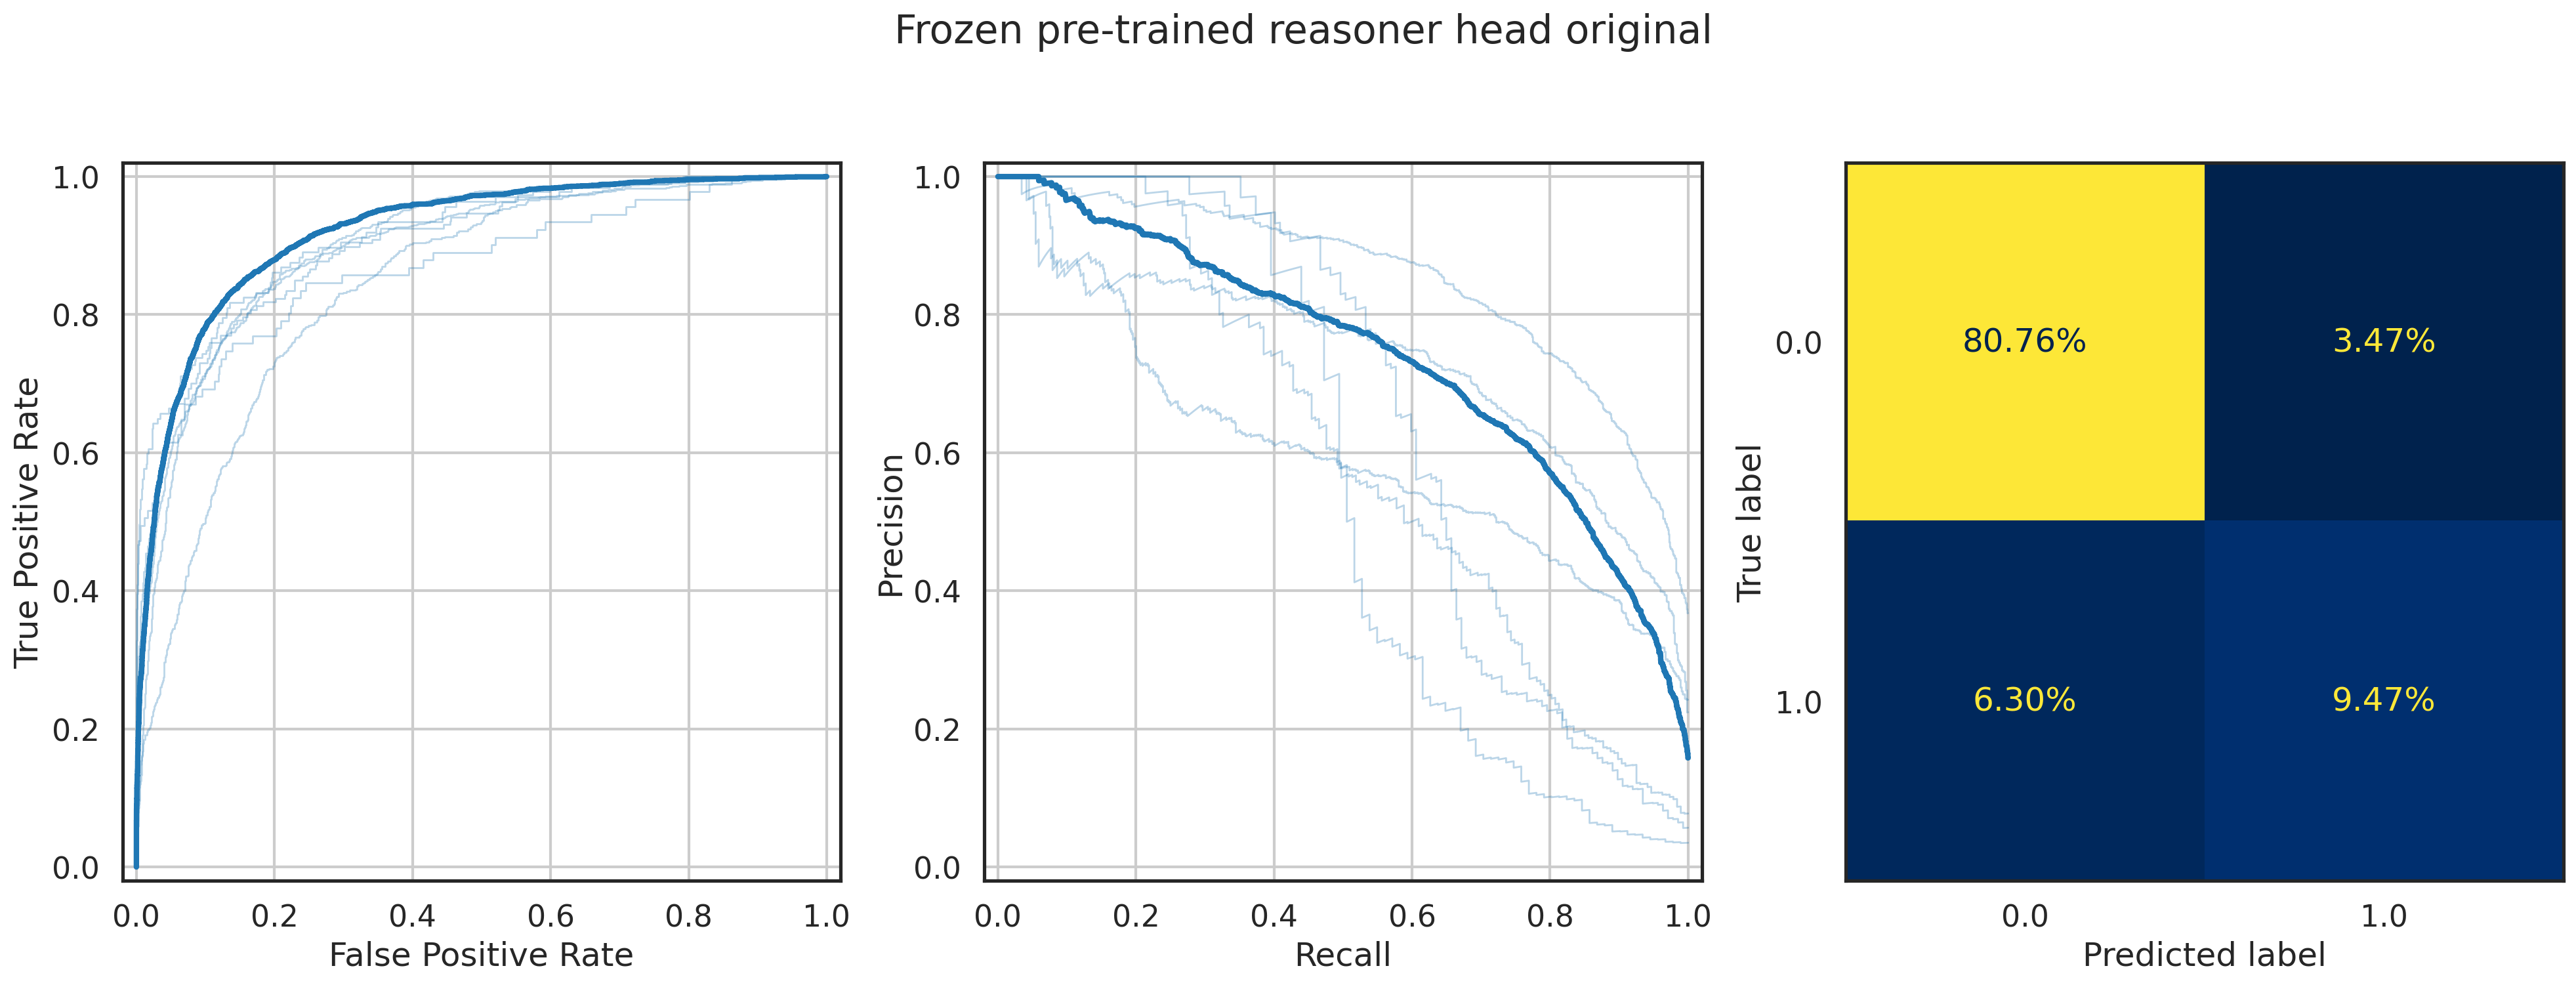

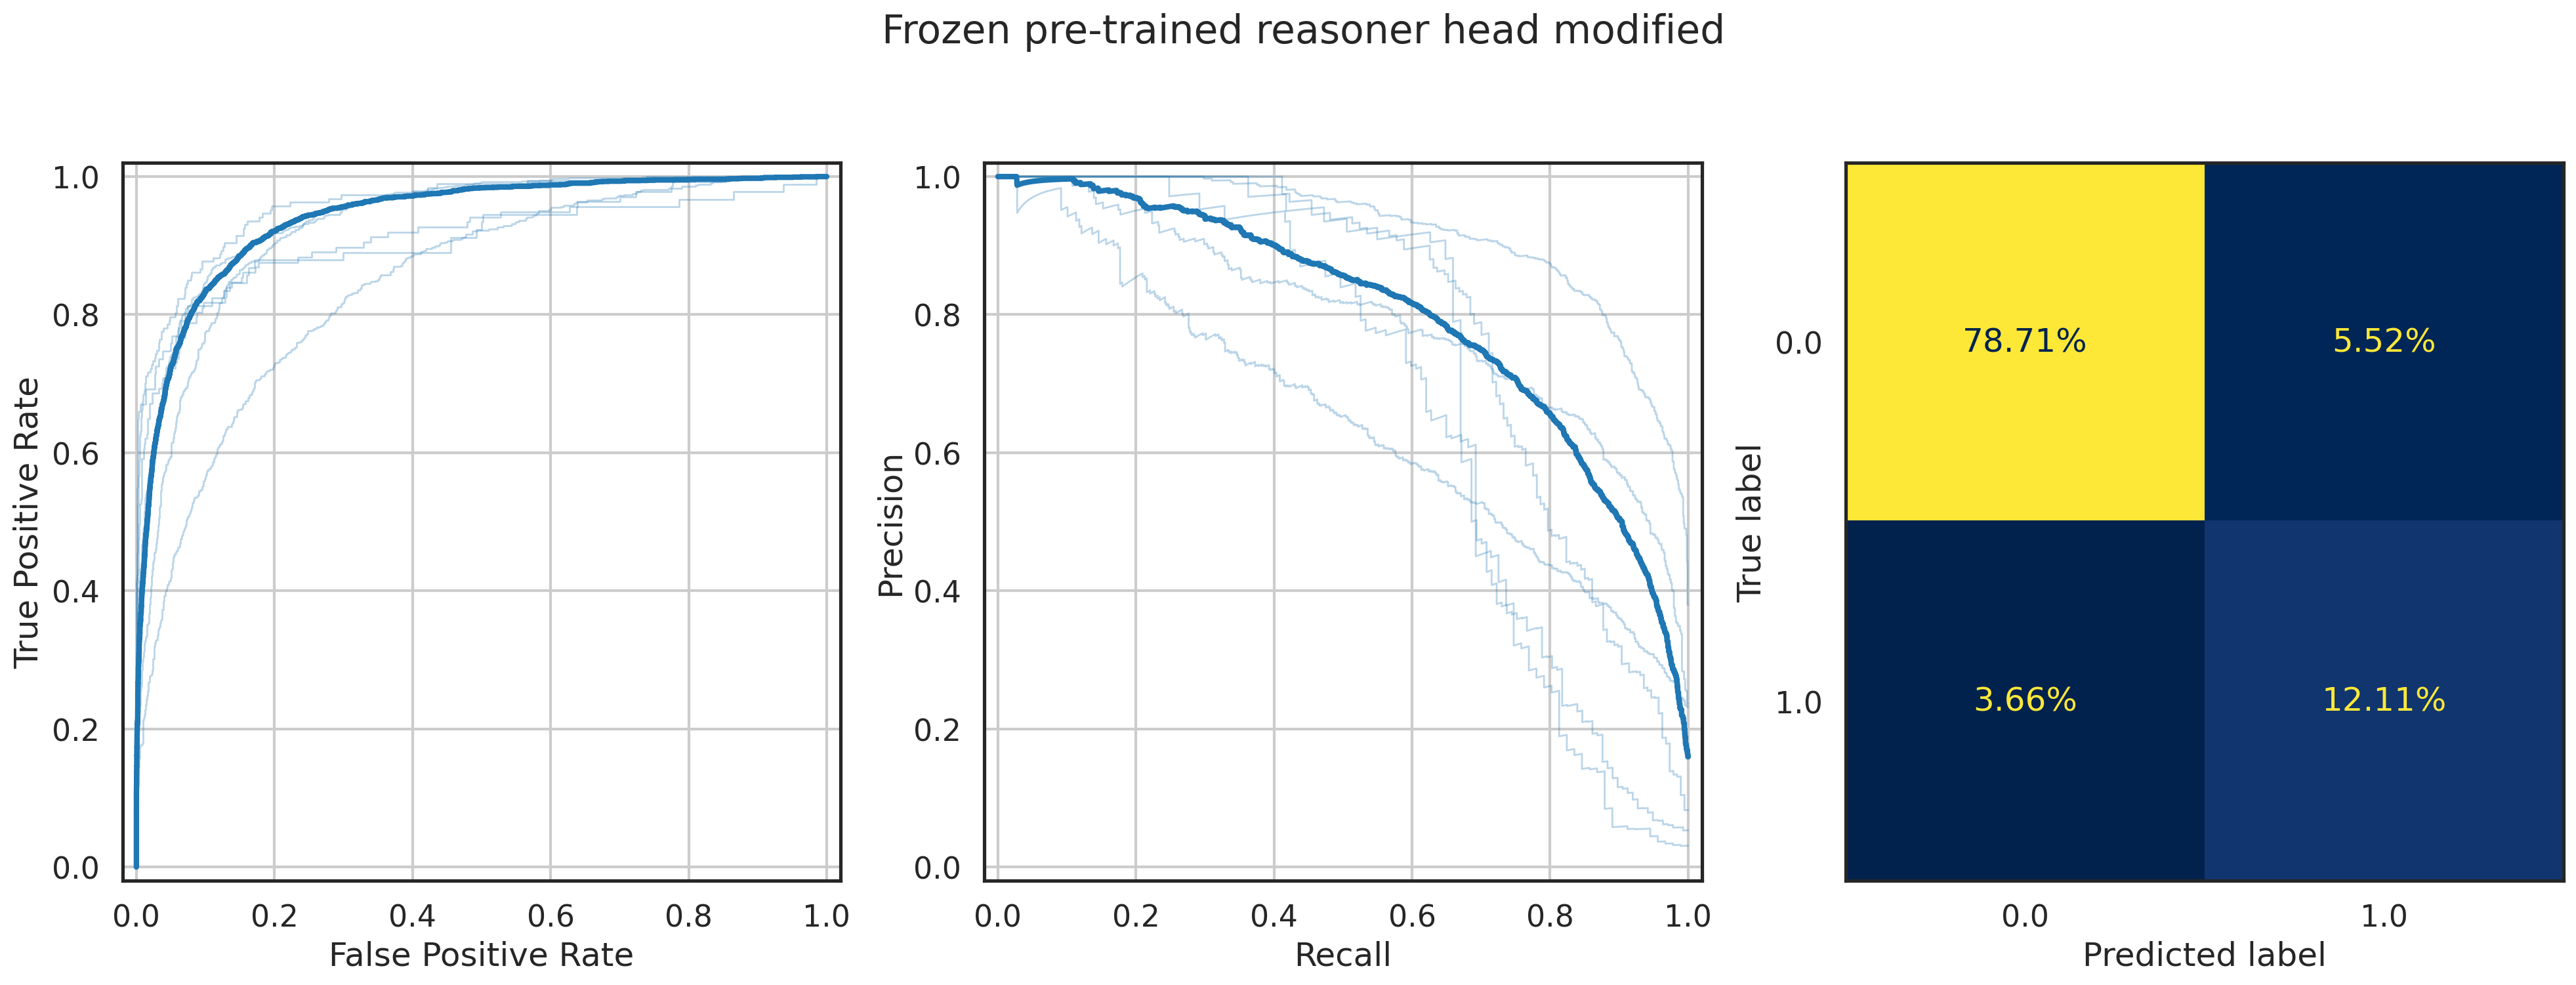

In [6]:
titles = 'Frozen pre-trained reasoner head original', 'Frozen pre-trained reasoner head modified'
logs = transfer_log_orig, transfer_log
heads = transfer_r_orig_head, transfer_r_head
embeddings = transfer_r_orig_embs, transfer_r_embs

base = 'local/out/exp/' + ts
mkdirp(base)
print(base)

for head, embs, log, title in zip(heads, embeddings, logs, titles):
    print('------')
    with T.no_grad():
        head.eval()
        if title == 'Frozen pre-trained reasoner head original':
            _, _, Y_te = eval_batch(head, embs, X_te, y_te, idx_te)
        else:
            _, _, Y_te = eval_batch_mod(head, embs, X_te, y_te, idx_te)

    print(title)
    
    history_tr = pd.DataFrame(log.history_tr)
    test_history_by_onto = pd.DataFrame(log.history_vl_by_onto)
    test_history = pd.DataFrame(log.history_vl)
    test_results = pd.DataFrame(dict(idx_te=idx_te, y_te=y_te, Y_te=Y_te))
    test_history.to_csv(base+f'/{title} test.csv', index=False)
    test_history_by_onto.to_csv(base+f'/{title} test by onto.csv', index=False)
    test_results.to_csv(base+f'/{title} test clas.csv', index=False)

    print('train time', history_tr.groupby('epoch').max().elapsed.sum())
    print(report(ontos, y_te, Y_te, idx_te).round(4))
    plt.suptitle(title)

In [7]:
onto_names = 'wildlife demacare stuff swo ontodt pizza'.split()
for head, embs, log, title in zip(heads, embeddings, logs, titles):
    df = pd.DataFrame(log.history_vl_by_onto)
    df = df[df.epoch == df.epoch.max()].drop(columns=['epoch', 'run', 'elapsed'])
    df.onto = df.onto.map(onto_names.__getitem__)
    print('-'*10)
    print(title)
    #print(df.agg(['mean', 'std']).round(4).T)
    print(df.round(4))

----------
Frozen pre-trained reasoner head original
       acc      f1    prec  recall  roc_auc  pr_auc      onto
60  0.9537  0.5615  0.7063  0.4660   0.8983  0.6114  wildlife
61  0.9790  0.6441  0.7500  0.5644   0.8749  0.6339  demacare
62  0.8517  0.6515  0.7136  0.5994   0.9025  0.7201     stuff
63  0.8187  0.5350  0.5520  0.5191   0.8382  0.5869       swo
64  0.9677  0.6041  0.6981  0.5324   0.9000  0.6479    ontodt
65  0.8203  0.7249  0.7924  0.6679   0.8903  0.8426     pizza
----------
Frozen pre-trained reasoner head modified
       acc      f1    prec  recall  roc_auc  pr_auc      onto
60  0.9540  0.6776  0.6118  0.7592   0.9441  0.7845  wildlife
61  0.9663  0.5590  0.5000  0.6337   0.8813  0.6610  demacare
62  0.8610  0.7150  0.6801  0.7536   0.9262  0.7920     stuff
63  0.7950  0.5744  0.4929  0.6882   0.8396  0.6244       swo
64  0.9580  0.6228  0.5333  0.7482   0.9509  0.7578    ontodt
65  0.8753  0.8259  0.8175  0.8344   0.9413  0.9108     pizza


In [8]:
from src.id import print_identity_results
print(print_identity_results(transfer_r_orig_head, transfer_r_orig_embs, seed))

Double Negation:
  Mean Loss: 0.222936
  Std Dev Loss: 0.023435
  Mean Diff: 0.558789
  Std Dev Diff: 0.088679

Duality of Top and Bottom:
  Mean Loss: 0.335481
  Std Dev Loss: 0.000000
  Mean Diff: 0.692846
  Std Dev Diff: 0.000000

Idempotence:
  Mean Loss: 0.113375
  Std Dev Loss: 0.035492
  Mean Diff: 0.282707
  Std Dev Diff: 0.091490

Associativity:
  Mean Loss: 0.037312
  Std Dev Loss: 0.017349
  Mean Diff: 0.076875
  Std Dev Diff: 0.028479

Commutativity:
  Mean Loss: 0.026213
  Std Dev Loss: 0.012701
  Mean Diff: 0.061350
  Std Dev Diff: 0.028194

Contradiction:
  Mean Loss: 0.417221
  Std Dev Loss: 0.012936
  Mean Diff: 0.887622
  Std Dev Diff: 0.046740

Identity with Top:
  Mean Loss: 0.150810
  Std Dev Loss: 0.037405
  Mean Diff: 0.425335
  Std Dev Diff: 0.107395

Absorption by Bottom:
  Mean Loss: 0.619016
  Std Dev Loss: 0.022861
  Mean Diff: 1.284021
  Std Dev Diff: 0.062942

Top Concept Subsumption:
  Mean Loss: 0.000745
  Std Dev Loss: 0.000693
  Mean Diff: N/A
  Std De

In [9]:
print(print_identity_results(transfer_r_head, transfer_r_embs, seed))

Double Negation:
  Mean Loss: 0.000007
  Std Dev Loss: 0.000003
  Mean Diff: 0.000018
  Std Dev Diff: 0.000009

Duality of Top and Bottom:
  Mean Loss: 0.000164
  Std Dev Loss: 0.000000
  Mean Diff: 0.000463
  Std Dev Diff: 0.000000

Idempotence:
  Mean Loss: 0.111905
  Std Dev Loss: 0.032827
  Mean Diff: 0.252232
  Std Dev Diff: 0.088286

Associativity:
  Mean Loss: 0.015761
  Std Dev Loss: 0.007478
  Mean Diff: 0.035671
  Std Dev Diff: 0.017452

Commutativity:
  Mean Loss: 0.017793
  Std Dev Loss: 0.010730
  Mean Diff: 0.043965
  Std Dev Diff: 0.026970

Contradiction:
  Mean Loss: 0.165956
  Std Dev Loss: 0.037247
  Mean Diff: 0.268412
  Std Dev Diff: 0.068758

Identity with Top:
  Mean Loss: 0.055981
  Std Dev Loss: 0.024068
  Mean Diff: 0.137319
  Std Dev Diff: 0.062281

Absorption by Bottom:
  Mean Loss: 0.024191
  Std Dev Loss: 0.008755
  Mean Diff: 0.047022
  Std Dev Diff: 0.014268

Top Concept Subsumption:
  Mean Loss: 0.000739
  Std Dev Loss: 0.001272
  Mean Diff: N/A
  Std De